# Final Laboratory Notebook

### Name: Kaegon Matlock     


### Date: 10/26/22


### PID: 730401999


### Jupyter Notebook Number: Week 11

## Purpose/Objective:

To find means of time to first spike for the various conditions so that we can perform our statistical analysis on the data. 

## Protocol:

- Pull table from info put in the PSTH
- Find time to first spike
    - Set a threshold for how much change from baseline for it to be considered a “spike” in the graph
- Separate these based on the specific stimulus presented to make sure that's not a confounding variable
- Loop through sessions 
- Tabulate data together so we can run stat. analyses 


## Expected Results:

We expect to find faster time to spike in familiar stimuli and specifically that females will have agreater change in time to spike from novel to familiar. 

### Installing AllenSDK into your local environment. 

In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [2]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st
import statistics as stat

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})


In [3]:
pip install tabulate


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tabulate import tabulate

In [6]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### If working with Neuropixels: Visual Behavior Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [7]:
#this code block should only be run if you are working with the Visual Behavior neuropixels data
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

data_directory = Path("/overflow/NSCI274/projects/EcephysBehaviorData/")

cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(cache_dir=data_directory)

### Loading Cache for sessions table
This will allow us to narrow down which specific sessions we will look at spike times for. 

In [8]:
sessions = cache.get_ecephys_session_table()

### Separating Male and Female Sessions

In [9]:
session_m = sessions[(sessions.sex == 'M')]

session_f = sessions[(sessions.sex == 'F')]

In [10]:
session_m.head()

,behavior_session_id,date_of_acquisition,equipment_name,session_type,mouse_id,genotype,sex,project_code,age_in_days,unit_count,...,channel_count,structure_acronyms,image_set,prior_exposures_to_image_set,session_number,experience_level,prior_exposures_to_omissions,file_id,abnormal_histology,abnormal_activity
ecephys_session_id,,,,,,,,,,,,,,,,,,,,,
1052342277,1052374521,2020-09-23 15:34:18.179,NP.1,EPHYS_1_images_G_3uL_reward,530862,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,148,1696.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",G,32.0,1,Familiar,0.0,0,NaN,NaN
1052533639,1052572359,2020-09-24 15:12:13.229,NP.1,EPHYS_1_images_H_3uL_reward,530862,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,149,1677.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1.0,4,NaN,NaN
1053925378,1053960984,2020-10-01 16:07:18.990,NP.0,EPHYS_1_images_H_3uL_reward,532246,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,145,1823.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1.0,5,NaN,NaN
1053941483,1053960987,2020-10-01 17:03:58.362,NP.1,EPHYS_1_images_H_3uL_reward,527749,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,180,1543.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1.0,6,NaN,NaN
1055221968,1055253879,2020-10-07 14:01:41.373,NP.1,EPHYS_1_images_G_3uL_reward,533537,wt/wt,M,NeuropixelVisualBehavior,143,2585.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",G,34.0,1,Familiar,0.0,7,NaN,NaN


### Separating Novel and Familiar Sessions for each brain region
This will allow us to compare spike times based on experience level

In [35]:
session_m_novel_ca1 = session_m[(session_m.experience_level == "Novel") &
                            [("CA1" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_novel_ca3 = session_m[(session_m.experience_level == "Novel") &
                            [("CA3" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_novel_dg = session_m[(session_m.experience_level == "Novel") &
                            [("DG-mo" or "DG-po" or "DG-sg" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_novel_sub = session_m[(session_m.experience_level == "Novel") &
                            [("SUB" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_novel_prosub = session_m[(session_m.experience_level == "Novel") &
                            [("ProS" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_fam_ca1 = session_m[(session_m.experience_level == "Familiar") &
                            [("CA1" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_fam_ca3 = session_m[(session_m.experience_level == "Familiar") &
                            [("CA3" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_fam_dg = session_m[(session_m.experience_level == "Familiar") &
                            [("DG-mo" or "DG-po" or "DG-sg" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_fam_sub = session_m[(session_m.experience_level == "Familiar") &
                            [("SUB" in acronyms for acronyms in session_m.structure_acronyms)]]
session_m_fam_prosub = session_m[(session_m.experience_level == "Familiar") &
                            [("ProS" in acronyms for acronyms in session_m.structure_acronyms)]]
session_f_novel_ca1 = session_f[(session_f.experience_level == "Novel") &
                            [("CA1" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_novel_ca3 = session_f[(session_f.experience_level == "Novel") &
                            [("CA3" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_novel_dg = session_f[(session_f.experience_level == "Novel") &
                            [("DG-mo" or "DG-po" or "DG-sg" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_novel_sub = session_f[(session_f.experience_level == "Novel") &
                            [("SUB" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_novel_prosub = session_f[(session_f.experience_level == "Novel") &
                            [("ProS" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_fam_ca1 = session_f[(session_f.experience_level == "Familiar") &
                            [("CA1" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_fam_ca3 = session_f[(session_f.experience_level == "Familiar") &
                            [("CA3" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_fam_dg = session_f[(session_f.experience_level == "Familiar") &
                            [("DG-mo" or "DG-po" or "DG-sg" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_fam_sub = session_f[(session_f.experience_level == "Familiar") &
                            [("SUB" in acronyms for acronyms in session_f.structure_acronyms)]]
session_f_fam_prosub = session_f[(session_f.experience_level == "Familiar") &
                            [("ProS" in acronyms for acronyms in session_f.structure_acronyms)]]



### This code from Allen Institute will make a 3D array which houses the spike data we will plot. 

In [12]:
def make_neuron_time_trials_array(units, spike_times, stim_table, 
                                   time_before, trial_duration,
                                   bin_size=0.001):
    '''
    Function to make a 3D array with dimensions [neurons, time bins, trials] to store
    the spike counts for stimulus presentation trials. 
    INPUTS:
        units: dataframe with unit info (same form as session.units table)
        stim_table: dataframe whose indices are trial ids and containing a
            'start_time' column indicating when each trial began
        time_before: seconds to take before each start_time in the stim_table
        trial_duration: total time in seconds to take for each trial
        bin_size: bin_size in seconds used to bin spike counts 
    OUTPUTS:
        unit_array: 3D array storing spike counts. The value in [i,j,k] 
            is the spike count for neuron i at time bin j in the kth trial.
        time_vector: vector storing the trial timestamps for the time bins
    '''
    # Get dimensions of output array
    neuron_number = len(units)
    trial_number = len(stim_table)
    num_time_bins = int(trial_duration/bin_size)
    
    # Initialize array
    unit_array = np.zeros((neuron_number, num_time_bins, trial_number))
    
    # Loop through units and trials and store spike counts for every time bin
    for u_counter, (iu, unit) in enumerate(units.iterrows()):
        
        # grab spike times for this unit
        unit_spike_times = spike_times[iu]
        
        # now loop through trials and make a PSTH for this unit for every trial
        for t_counter, (it, trial) in enumerate(stim_table.iterrows()):
            trial_start = trial.start_time - time_before
            unit_array[u_counter, :, t_counter] = makePSTH(unit_spike_times, 
                                                            [trial_start], 
                                                            trial_duration, 
                                                            binSize=bin_size)[0]
    
    # Make the time vector that will label the time axis
    time_vector = np.arange(num_time_bins)*bin_size - time_before
    
    return unit_array, time_vector

### This function makes a PSTH with spike data

In [13]:
#Convenience function to compute the PSTH
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/startTimes.size
    return counts/binSize, bins

### This block is an example of how we would extract the data we need and to merge different objects to easily sort it. 

In [14]:
session_id = 1053709239		
current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
current_channels = current_session.get_channels()
current_units = current_session.get_units()
current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)


#current_units_channels_ca1 = current_units_channels[current_units_channels.structure_acronym == "CA1"]
#current_units_channels_ca1.head()


/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [15]:
#first let's sort our units by depth
current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))

good_units = current_units_channels.loc[good_unit_filter]
spike_times = current_session.spike_times

In [16]:
stimulus_presentations = current_session.stimulus_presentations
change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values

In [17]:
#Here's where we loop through the units in our area of interest and compute their PSTHs
area_of_interest = 'CA1'
area_change_responses = []
area_units = good_units[good_units['structure_acronym']==area_of_interest]
time_before_change = 1
duration = 2.5
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_change_response, bins = makePSTH(unit_spike_times, 
                                          change_times-time_before_change, 
                                          duration, binSize=0.01)
    area_change_responses.append(unit_change_response)
area_change_responses = np.array(area_change_responses)



#### Attempting to pull the same data but in a Dataframe format
- does not seem to work this way

Text(0, 0.5, 'Firing Rate')

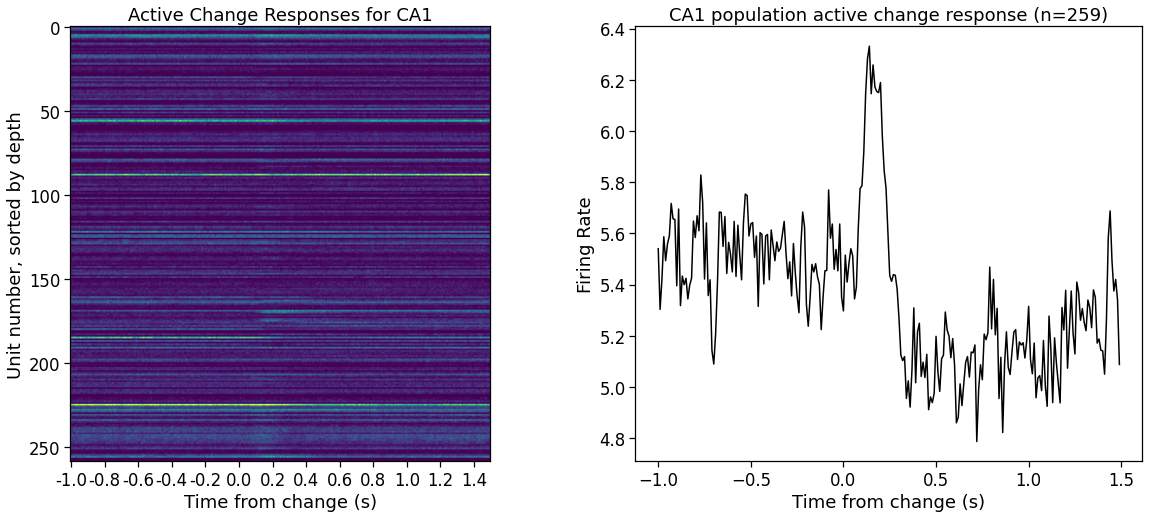

In [18]:
#Plot the results
fig, ax = plt.subplots(1,2)
fig.set_size_inches([20,8])

clims = [np.percentile(area_change_responses, p) for p in (0.1,99.9)]
im = ax[0].imshow(area_change_responses, clim=clims)
ax[0].set_title('Active Change Responses for {}'.format(area_of_interest))
ax[0].set_ylabel('Unit number, sorted by depth')
ax[0].set_xlabel('Time from change (s)')
ax[0].set_xticks(np.arange(0, bins.size-1, 20))
_ = ax[0].set_xticklabels(np.round(bins[:-1:20]-time_before_change, 2))

ax[1].plot(bins[:-1]-time_before_change, np.mean(area_change_responses, axis=0), 'k')
ax[1].set_title('{} population active change response (n={})'\
                .format(area_of_interest, area_change_responses.shape[0]))
ax[1].set_xlabel('Time from change (s)')
ax[1].set_ylabel('Firing Rate')



#### Looping through and Appending sessions with their metrics
within the loop we need to filter through the units table
#### *** THIS BLOCK WORKS vvvv

# Looping through sessions for the various filters

In [19]:
data_index = np.arange(-1, 1.5, 0.01).tolist()

## Male Data

### CA1 MALE FAMILIAR 

In [36]:
data_m_fam_ca1 = pd.DataFrame()
data_m_fam_ca1["Time From Change (s)"] = data_index
data_m_fam_ca1.index = data_index

for values in session_m_fam_ca1.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'CA1'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_fam_ca1[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [61]:
data_m_fam_ca1.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_fam_ca1.pkl')
data_m_fam_ca1.to_csv('/pine/scr/k/a/kaegon/csv/data_m_fam_ca1.csv')

### CA1 MALE NOVEL

In [20]:
data_m_novel_ca1 = pd.DataFrame()
data_m_novel_ca1["Time From Change (s)"] = data_index
data_m_novel_ca1.index = data_index

for values in session_m_novel_ca1.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'CA1'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_novel_ca1[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_m_novel_ca1

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

       Time From Change (s)  Session:1052533639 n=164  \
-1.00                 -1.00                  6.352352   
-0.99                 -0.99                  6.437282   
-0.98                 -0.98                  6.822735   
-0.97                 -0.97                  6.450348   
-0.96                 -0.96                  6.528746   
...                     ...                       ...   
 1.45                  1.45                  6.378484   
 1.46                  1.46                  6.332753   
 1.47                  1.47                  6.378484   
 1.48                  1.48                  6.554878   
 1.49                  1.49                  6.380662   

       Session:1053925378 n=192  Session:1053941483 n=215  \
-1.00                  5.495833                  6.385204   
-0.99                  5.391667                  6.570938   
-0.98                  5.308333                  6.296238   
-0.97                  5.081250                  6.602154   
-0.96     

In [ ]:
data_m_novel_ca1.to_pickle('/pine/scr/k/a/kaegon/data_m_novel_ca1.pkl')
data_m_novel_ca1.to_csv('/pine/scr/k/a/kaegon/data_m_novel_ca1.csv')

### CA3 MALE FAMILIAR

In [45]:
data_m_fam_ca3 = pd.DataFrame()
data_m_fam_ca3["Time From Change (s)"] = data_index
data_m_fam_ca3.index = data_index

for values in session_m_fam_ca3.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'CA3'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_fam_ca3[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_m_fam_ca3

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


       Time From Change (s)  Session:1052342277 n=20  Session:1055221968 n=29  \
-1.00                 -1.00                 2.811388                 2.498751   
-0.99                 -0.99                 2.686833                 2.348826   
-0.98                 -0.98                 2.864769                 2.273863   
-0.97                 -0.97                 2.651246                 2.548726   
-0.96                 -0.96                 2.918149                 2.461269   
...                     ...                      ...                      ...   
 1.45                  1.45                 3.149466                 3.073463   
 1.46                  1.46                 2.740214                 2.798601   
 1.47                  1.47                 2.580071                 2.961019   
 1.48                  1.48                 2.562278                 3.048476   
 1.49                  1.49                 2.419929                 2.936032   

       Session:1053709239 n

In [62]:
data_m_fam_ca3.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_fam_ca3.pkl')
data_m_fam_ca3.to_csv('/pine/scr/k/a/kaegon/csv/data_m_fam_ca3.csv')

### CA3 MALE NOVEL

In [46]:
data_m_novel_ca3 = pd.DataFrame()
data_m_novel_ca3["Time From Change (s)"] = data_index
data_m_novel_ca3.index = data_index

for values in session_m_novel_ca3.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'CA3'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_novel_ca3[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_m_novel_ca3

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


       Time From Change (s)  Session:1052533639 n=36  Session:1053925378 n=66  \
-1.00                 -1.00                 9.573413                 9.442424   
-0.99                 -0.99                 9.414683                 9.012121   
-0.98                 -0.98                 9.940476                 8.666667   
-0.97                 -0.97                 9.305556                 8.678788   
-0.96                 -0.96                 9.742063                 8.854545   
...                     ...                      ...                      ...   
 1.45                  1.45                 9.672619                 8.963636   
 1.46                  1.46                 9.186508                 8.921212   
 1.47                  1.47                 9.166667                 9.248485   
 1.48                  1.48                 9.216270                 9.145455   
 1.49                  1.49                 9.692460                 9.181818   

       Session:1053941483 n

In [63]:
data_m_novel_ca3.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_novel_ca3.pkl')
data_m_novel_ca3.to_csv('/pine/scr/k/a/kaegon/csv/data_m_novel_ca3.csv')

### DG MALE FAMILIAR

In [47]:
data_m_fam_dg = pd.DataFrame()
data_m_fam_dg["Time From Change (s)"] = data_index
data_m_fam_dg.index = data_index

for values in session_m_fam_dg.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'DG'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_fam_dg[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_m_fam_dg

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


       Time From Change (s)  Session:1052342277 n=82  \
-1.00                 -1.00                 6.366635   
-0.99                 -0.99                 6.453433   
-0.98                 -0.98                 6.592310   
-0.97                 -0.97                 7.356132   
-0.96                 -0.96                 6.622689   
...                     ...                      ...   
 1.45                  1.45                 6.531551   
 1.46                  1.46                 6.418714   
 1.47                  1.47                 6.366635   
 1.48                  1.48                 6.284177   
 1.49                  1.49                 6.822324   

       Session:1055221968 n=146  Session:1053709239 n=77  \
-1.00                  6.372841                 7.246163   
-0.99                  6.127159                 6.813262   
-0.98                  6.288465                 6.828020   
-0.97                  6.424955                 6.837859   
-0.96                  6.50

In [64]:
data_m_fam_dg.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_fam_dg.pkl')
data_m_fam_dg.to_csv('/pine/scr/k/a/kaegon/csv/data_m_fam_dg.csv')

### DG MALE NOVEL

In [48]:
data_m_novel_dg = pd.DataFrame()
data_m_novel_dg["Time From Change (s)"] = data_index
data_m_novel_dg.index = data_index

for values in session_m_novel_dg.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'DG'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_novel_dg[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_m_novel_dg

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


       Time From Change (s)  Session:1052533639 n=54  Session:1053925378 n=44  \
-1.00                 -1.00                 6.752646                 7.372727   
-0.99                 -0.99                 7.050265                 7.563636   
-0.98                 -0.98                 7.056878                 7.654545   
-0.97                 -0.97                 6.633598                 7.818182   
-0.96                 -0.96                 7.189153                 7.727273   
...                     ...                      ...                      ...   
 1.45                  1.45                 7.089947                 8.445455   
 1.46                  1.46                 6.468254                 8.963636   
 1.47                  1.47                 6.375661                 8.290909   
 1.48                  1.48                 6.660053                 8.681818   
 1.49                  1.49                 6.488095                 8.445455   

       Session:1053941483 n

In [65]:
data_m_novel_dg.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_novel_dg.pkl')
data_m_novel_dg.to_csv('/pine/scr/k/a/kaegon/csv/data_m_novel_dg.csv')

### SUBICULUM MALE FAMILAR

In [22]:
data_m_fam_sub = pd.DataFrame()
data_m_fam_sub["Time From Change (s)"] = data_index
data_m_fam_sub.index = data_index

for values in session_m_fam_sub.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'SUB'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_fam_sub[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_m_fam_sub

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

       Time From Change (s)  Session:1052342277 n=50  \
-1.00                 -1.00                 3.387900   
-0.99                 -0.99                 3.444840   
-0.98                 -0.98                 3.195730   
-0.97                 -0.97                 3.437722   
-0.96                 -0.96                 3.345196   
...                     ...                      ...   
 1.45                  1.45                 3.117438   
 1.46                  1.46                 3.266904   
 1.47                  1.47                 3.131673   
 1.48                  1.48                 3.224199   
 1.49                  1.49                 2.989324   

       Session:1053709239 n=207  Session:1053718935 n=62  \
-1.00                  8.110086                 0.920963   
-0.99                  7.927097                 1.130494   
-0.98                  8.141195                 1.130494   
-0.97                  8.155834                 1.067147   
-0.96                  8.31

In [23]:
data_m_fam_sub.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_fam_sub.pkl')
data_m_fam_sub.to_csv('/pine/scr/k/a/kaegon/csv/data_m_fam_sub.csv')

### SUBICULUM MALE NOVEL

In [24]:
data_m_novel_sub = pd.DataFrame()
data_m_novel_sub["Time From Change (s)"] = data_index
data_m_novel_sub.index = data_index

for values in session_m_novel_sub.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'SUB'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_novel_sub[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
print(data_m_novel_sub)

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

       Time From Change (s)  Session:1053925378 n=129  \
-1.00                 -1.00                  7.634109   
-0.99                 -0.99                  7.956589   
-0.98                 -0.98                  7.897674   
-0.97                 -0.97                  7.751938   
-0.96                 -0.96                  8.089922   
...                     ...                       ...   
 1.45                  1.45                  7.947287   
 1.46                  1.46                  7.565891   
 1.47                  1.47                  7.981395   
 1.48                  1.48                  7.600000   
 1.49                  1.49                  7.655814   

       Session:1053941483 n=31  Session:1064644573 n=8  \
-1.00                 9.417623               13.292683   
-0.99                10.359385               12.682927   
-0.98                 9.688244               12.682927   
-0.97                 9.796493               13.231707   
-0.96                 8.8

In [84]:
data_m_novel_sub.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_novel_sub.pkl')
data_m_novel_sub.to_csv('/pine/scr/k/a/kaegon/csv/data_m_novel_sub.csv')

### PROSUBICULUM MALE FAMILIAR

In [26]:
data_m_fam_prosub = pd.DataFrame()
data_m_fam_prosub["Time From Change (s)"] = data_index
data_m_fam_prosub.index = data_index

for values in session_m_fam_prosub.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'ProS'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_fam_prosub[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
print(data_m_fam_prosub)

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

       Time From Change (s)  Session:1053709239 n=4  Session:1053718935 n=52  \
-1.00                 -1.00                5.018939                 8.284917   
-0.99                 -0.99                3.882576                 8.110620   
-0.98                 -0.98                3.030303                 8.081571   
-0.97                 -0.97                3.219697                 8.116430   
-0.96                 -0.96                4.166667                 8.232628   
...                     ...                     ...                      ...   
 1.45                  1.45                2.272727                 9.900070   
 1.46                  1.46                3.219697                 9.667674   
 1.47                  1.47                3.030303                 9.231931   
 1.48                  1.48                3.977273                 9.249361   
 1.49                  1.49                3.787879                 9.353939   

       Session:1152632711 n=123  Sessio

In [37]:
data_m_fam_prosub.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_fam_prosub.pkl')
data_m_fam_prosub.to_csv('/pine/scr/k/a/kaegon/csv/data_m_fam_prosub.csv')

### PROSUBICULUM MALE NOVEL

In [38]:
data_m_novel_prosub = pd.DataFrame()
data_m_novel_prosub["Time From Change (s)"] = data_index
data_m_novel_prosub.index = data_index

for values in session_m_novel_prosub.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'ProS'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_m_novel_prosub[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
print(data_m_novel_prosub)

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

       Time From Change (s)  Session:1052533639 n=73  Session:1053925378 n=1  \
-1.00                 -1.00                12.035225                     2.8   
-0.99                 -0.99                11.443249                     2.0   
-0.98                 -0.98                11.252446                     1.2   
-0.97                 -0.97                11.120352                     3.6   
-0.96                 -0.96                10.841487                     1.6   
...                     ...                      ...                     ...   
 1.45                  1.45                11.208415                     1.6   
 1.46                  1.46                10.841487                     0.8   
 1.47                  1.47                10.812133                     1.6   
 1.48                  1.48                11.849315                     2.4   
 1.49                  1.49                11.751468                     0.4   

       Session:1064644573 n=62  Session

In [39]:
data_m_novel_prosub.to_pickle('/pine/scr/k/a/kaegon/pkl/data_m_novel_prosub.pkl')
data_m_novel_prosub.to_csv('/pine/scr/k/a/kaegon/csv/data_m_novel_prosub.csv')

## Female Data

### CA1 FEMALE NOVEL 

In [30]:
data_f_novel_ca1 = pd.DataFrame()
data_f_novel_ca1["Time From Change (s)"] = data_index
data_f_novel_ca1.index = data_index

for values in session_f_novel_ca1.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'CA1'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_novel_ca1[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

In [40]:
data_f_novel_ca1.to_csv('/pine/scr/k/a/kaegon/csv/data_f_novel_ca1.csv')
data_f_novel_ca1.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_ca1.pkl')

### CA1 FEMALE FAMILIAR 

In [41]:
data_f_fam_ca1 = pd.DataFrame()
data_f_fam_ca1["Time From Change (s)"] = data_index
data_f_fam_ca1.index = data_index

for values in session_f_fam_ca1.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'CA1'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_fam_ca1[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

In [42]:
data_f_fam_ca1.to_csv('/pine/scr/k/a/kaegon/csv/data_f_fam_ca1.csv')
data_f_fam_ca1.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_ca1.pkl')

### CA3 FEMALE FAMILIAR

In [43]:
data_f_fam_ca3 = pd.DataFrame()
data_f_fam_ca3["Time From Change (s)"] = data_index
data_f_fam_ca3.index = data_index

for values in session_f_fam_ca3.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'CA3'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_fam_ca3[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_f_fam_ca3

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

,Time From Change (s),Session:1055240613 n=103,Session:1044385384 n=41,Session:1065437523 n=45,Session:1049273528 n=22,Session:1081090969 n=11,Session:1086200042 n=15,Session:1093638203 n=107,Session:1093642839 n=37,Session:1104052767 n=63,Session:1105543760 n=56,Session:1108334384 n=21,Session:1112302803 n=32,Session:1123100019 n=38,Session:1124507277 n=40,Session:1125937457 n=19,Session:1130113579 n=104
-1.00,-1.00,8.881108,10.653094,5.543434,5.367965,3.056769,2.584148,7.492020,5.269653,4.819048,4.302326,4.913343,6.768216,4.782260,10.000000,6.742532,6.943681
-0.99,-0.99,8.737864,10.249950,5.527273,6.645022,3.652243,2.366992,7.634322,5.084537,4.965079,4.269103,4.425374,6.234296,4.795618,10.675896,7.311522,7.050137
-0.98,-0.98,8.631758,10.048377,5.438384,5.562771,3.533148,2.193268,7.530480,5.269653,4.552381,4.310631,4.761905,7.160804,4.929201,10.390879,6.770982,6.799451
-0.97,-0.97,8.812139,10.915138,5.543434,5.735931,3.096467,2.280130,7.530480,5.109219,4.768254,4.144518,4.526334,6.407035,5.036067,10.708469,7.055477,6.816621
-0.96,-0.96,8.987214,10.925217,5.503030,5.714286,2.977372,2.301846,7.180493,4.689621,5.073016,4.451827,4.290762,6.846734,4.982634,10.920195,6.714083,7.019231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.45,1.45,8.324049,10.239871,5.010101,7.380952,3.017070,2.258415,7.738164,4.948784,4.895238,4.808970,4.728252,7.003769,5.904355,11.498371,6.486486,7.239011
1.46,1.46,8.578704,10.249950,4.945455,6.948052,3.969829,2.366992,7.676628,5.504134,5.733333,5.182724,4.627293,6.548367,5.877638,10.089577,5.633001,7.105082
1.47,1.47,8.430155,10.239871,4.872727,6.861472,3.572846,2.432139,7.957386,5.837344,5.593651,4.784053,4.930170,6.752513,5.022709,10.496743,6.315789,7.160027
1.48,1.48,8.637063,10.179399,5.042424,6.082251,3.533148,2.171553,7.672782,5.701592,5.593651,5.041528,4.930170,6.611181,5.036067,10.586319,6.429587,6.648352


In [44]:
data_f_fam_ca3.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_ca3.pkl')
data_f_fam_ca3.to_csv('/pine/scr/k/a/kaegon/csv/data_f_fam_ca3.csv')

### CA3 FEMALE NOVEL

In [45]:
data_f_novel_ca3 = pd.DataFrame()
data_f_novel_ca3["Time From Change (s)"] = data_index
data_f_novel_ca3.index = data_index

for values in session_f_novel_ca3.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'CA3'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_novel_ca3[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_f_novel_ca3

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

,Time From Change (s),Session:1051155866 n=26,Session:1055415082 n=59,Session:1044594870 n=58,Session:1048196054 n=7,Session:1065905010 n=30,Session:1049514117 n=3,Session:1081431006 n=95,Session:1086410738 n=71,Session:1093867806 n=60,Session:1093864136 n=31,Session:1104297538 n=62,Session:1105798776 n=35,Session:1108531612 n=50,Session:1112515874 n=52,Session:1115356973 n=37,Session:1122903357 n=53,Session:1124285719 n=28,Session:1125713722 n=36,Session:1130349290 n=143
-1.00,-1.00,5.890944,8.569216,8.077586,7.692308,4.452926,5.254516,4.612361,7.202187,10.367454,4.416642,6.650737,5.658263,6.450593,3.998262,6.481239,7.442831,4.955061,4.180151,8.093002
-0.99,-0.99,5.339176,9.963004,9.284483,7.642358,4.656489,4.105090,4.607993,7.011299,10.833333,4.672897,6.003584,6.031746,6.624506,3.487614,6.874836,7.312408,5.581835,3.870011,8.320147
-0.98,-0.98,5.809802,9.300525,8.439655,8.191808,4.580153,3.776683,4.629832,6.603725,9.822835,4.853784,5.993628,6.666667,7.098814,3.324641,6.315053,8.381880,5.250710,4.881338,8.355878
-0.97,-0.97,5.550146,9.481201,8.905172,7.992008,4.287532,5.418719,4.826381,6.773977,10.111549,4.959301,6.362007,5.508870,6.782609,3.628857,6.962302,8.129728,5.428098,3.600324,8.386504
-0.96,-0.96,5.420318,9.704895,9.318966,8.591409,4.707379,4.597701,5.022931,6.872001,9.881890,5.290926,5.973716,5.863679,7.130435,3.574533,7.320913,7.999304,5.640965,4.193635,8.113419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.45,1.45,5.907173,9.429579,9.810345,9.340659,4.173028,3.940887,4.813278,7.011299,10.019685,5.260778,6.989247,6.498599,7.573123,3.933073,8.090615,7.173289,5.144276,5.407228,8.554949
1.46,1.46,6.183057,8.982190,8.827586,9.340659,5.203562,4.761905,5.088447,7.238302,9.803150,4.808562,6.541219,5.471522,7.778656,3.628857,7.469606,7.060256,5.238884,4.800431,8.294625
1.47,1.47,5.420318,8.672460,8.534483,8.541459,5.559796,3.119869,5.153964,7.166073,9.750656,4.808562,6.640781,5.957049,7.478261,3.617992,7.662031,7.512390,5.085147,4.719525,8.437548
1.48,1.48,5.420318,9.068227,9.025862,9.090909,4.974555,3.612479,5.167067,6.748181,9.422572,4.808562,6.610912,6.554622,8.007905,3.780965,7.906936,7.442831,5.250710,5.191478,8.052167


In [46]:
data_f_novel_ca3.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_ca3.pkl')
data_f_novel_ca3.to_csv('/pine/scr/k/a/kaegon/csv/data_f_novel_ca3.csv')

### DG FEMALE FAMILIAR

In [47]:
data_f_fam_dg = pd.DataFrame()
data_f_fam_dg["Time From Change (s)"] = data_index
data_f_fam_dg.index = data_index

for values in session_f_fam_dg.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'DG'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_fam_dg[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_f_fam_dg

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

,Time From Change (s),Session:1055240613 n=88,Session:1044385384 n=90,Session:1047977240 n=7,Session:1065437523 n=84,Session:1049273528 n=50,Session:1081079981 n=121,Session:1081090969 n=141,Session:1086200042 n=23,Session:1093638203 n=95,...,Session:1104052767 n=95,Session:1105543760 n=51,Session:1108334384 n=49,Session:1112302803 n=99,Session:1115077618 n=182,Session:1118324999 n=134,Session:1123100019 n=107,Session:1124507277 n=101,Session:1125937457 n=100,Session:1130113579 n=52
-1.00,-1.00,6.544958,4.527089,4.516446,4.393939,3.876190,5.453269,6.169284,5.254213,6.229153,...,6.269474,5.335157,9.259393,5.101264,6.109453,6.503806,6.589497,7.485407,6.551351,4.752747
-0.99,-0.99,6.265524,5.123967,4.860088,4.614719,4.333333,5.542615,5.738796,4.730208,5.947585,...,5.903158,5.873233,9.295450,5.278920,6.498799,6.503806,6.594241,7.572484,6.935135,4.594780
-0.98,-0.98,5.538997,4.747475,4.565538,4.813853,4.190476,5.392642,5.930812,4.999292,5.700671,...,5.684211,5.398997,9.057475,5.385513,6.768066,6.382617,7.120831,7.817590,6.075676,4.931319
-0.97,-0.97,5.998510,4.641873,4.663721,4.567100,4.257143,5.561760,5.961783,5.027616,6.051549,...,6.501053,5.654355,8.711329,5.360134,6.640710,6.573968,7.206224,7.720837,6.562162,4.759615
-0.96,-0.96,6.104074,5.142332,4.909180,4.718615,4.219048,5.628769,5.342377,4.914318,6.142517,...,6.054737,5.955312,8.538256,5.177402,6.731679,6.369860,6.774515,7.659561,6.140541,5.288462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.45,1.45,6.942375,4.802571,12.322042,5.649351,4.552381,5.928715,5.695438,5.225889,5.588044,...,6.766316,6.475148,9.446888,5.715446,7.137399,6.010546,8.520328,8.098171,6.135135,5.377747
1.46,1.46,7.575758,4.931129,10.849288,5.415584,4.295238,6.072306,6.005141,5.395836,6.203162,...,7.570526,6.082991,9.266604,5.212933,6.964559,6.301824,8.174012,7.920792,6.351351,5.116758
1.47,1.47,7.581967,5.110193,12.665685,5.424242,4.495238,6.196752,6.091858,5.636595,6.094867,...,7.802105,6.174191,8.884402,5.471803,6.906339,6.087086,7.875136,8.078821,6.081081,5.274725
1.48,1.48,7.712370,4.357208,12.616593,5.199134,4.447619,5.887233,6.091858,5.126753,6.380767,...,7.848421,6.201550,8.574313,5.278920,6.950004,6.167879,7.913089,7.898217,7.016216,5.480769


In [48]:
data_f_fam_dg.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_dg.pkl')
data_f_fam_dg.to_csv('/pine/scr/k/a/kaegon/csv/data_f_fam_dg.csv')

### DG FEMALE NOVEL

In [49]:
data_f_novel_dg = pd.DataFrame()
data_f_novel_dg["Time From Change (s)"] = data_index
data_f_novel_dg.index = data_index

for values in session_f_novel_dg.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'DG'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_novel_dg[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
print(data_f_novel_dg)

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

       Time From Change (s)  Session:1051155866 n=64  Session:1055415082 n=64  \
-1.00                 -1.00                 5.425897                 5.940673   
-0.99                 -0.99                 5.359968                 5.195114   
-0.98                 -0.98                 5.557753                 5.583756   
-0.97                 -0.97                 5.630274                 5.393401   
-0.96                 -0.96                 5.748945                 5.274429   
...                     ...                      ...                      ...   
 1.45                  1.45                 6.414821                 6.416561   
 1.46                  1.46                 6.460970                 6.527602   
 1.47                  1.47                 6.322521                 5.853426   
 1.48                  1.48                 6.480749                 6.051713   
 1.49                  1.49                 5.933544                 6.115165   

       Session:1044594870 n

In [50]:
data_f_novel_dg.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_dg.pkl')
data_f_novel_dg.to_csv('/pine/scr/k/a/kaegon/csv/data_f_novel_dg.csv')

### SUBICULUM FEMALE FAMILAR

In [51]:
data_f_fam_sub = pd.DataFrame()
data_f_fam_sub["Time From Change (s)"] = data_index
data_f_fam_sub.index = data_index

for values in session_f_fam_sub.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'SUB'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_fam_sub[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
              
data_f_fam_sub

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

,Time From Change (s),Session:1055240613 n=80,Session:1047977240 n=58,Session:1065437523 n=44,Session:1049273528 n=16,Session:1081079981 n=89,Session:1086200042 n=152,Session:1093638203 n=181,Session:1093642839 n=21,Session:1104058216 n=85,Session:1105543760 n=78,Session:1108334384 n=108,Session:1112302803 n=53,Session:1115077618 n=94,Session:1118324999 n=83,Session:1123100019 n=86,Session:1124507277 n=48,Session:1125937457 n=55
-1.00,-1.00,8.750000,6.783979,7.661157,4.702381,6.854366,6.739671,9.874270,5.979561,6.852203,5.181872,6.468394,7.537688,8.873468,8.629389,7.885728,12.004615,4.717445
-0.99,-0.99,8.039617,6.878777,7.834711,5.059524,6.932454,6.915395,9.526408,5.740378,6.999789,4.800239,6.861013,6.864511,9.306749,7.980641,7.401724,12.303203,4.815725
-0.98,-0.98,8.989071,6.618083,7.214876,4.880952,6.476942,7.052546,9.626447,5.849098,6.793169,4.979129,6.867557,7.148952,8.887558,8.505818,7.649628,12.527144,5.022113
-0.97,-0.97,8.989071,7.246119,7.132231,4.761905,6.485619,7.033259,9.692381,5.718634,6.624499,5.223614,6.821751,6.883474,9.031985,8.255243,7.354504,11.801031,4.737101
-0.96,-0.96,9.009563,6.813604,7.280992,4.315476,6.511648,6.981828,9.392265,5.457708,6.687750,4.949314,7.093312,6.959325,8.517684,8.282703,7.260064,11.909609,4.638821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.45,1.45,7.301913,4.396255,6.297521,4.107143,7.279511,6.795388,9.940204,6.697108,6.451613,3.697078,6.281900,6.826586,8.975624,8.382247,5.636879,11.577090,4.560197
1.46,1.46,7.144809,4.390331,6.016529,4.404762,7.322893,6.943254,10.092536,7.305936,6.426312,3.995230,6.936265,7.006732,8.866422,8.141970,5.560146,11.685668,4.176904
1.47,1.47,7.725410,4.947269,5.446281,5.148810,7.839139,6.934682,10.087989,6.588389,6.468480,3.828265,6.514200,6.428368,9.053121,8.310164,6.067761,11.258143,4.953317
1.48,1.48,7.561475,4.609551,5.950413,5.238095,7.344584,6.705383,9.974308,6.240487,6.552815,3.673226,6.429132,6.978288,9.179935,8.193458,5.979223,11.807818,4.216216


In [52]:
data_f_fam_sub.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_sub.pkl')
data_f_fam_sub.to_csv('/pine/scr/k/a/kaegon/csv/data_f_fam_sub.csv')

### SUBICULUM FEMALE NOVEL

In [53]:
data_f_novel_sub = pd.DataFrame()
data_f_novel_sub["Time From Change (s)"] = data_index
data_f_novel_sub.index = data_index

for values in session_f_novel_sub.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'SUB'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_novel_sub[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_f_novel_sub

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

,Time From Change (s),Session:1051155866 n=73,Session:1055415082 n=49,Session:1048196054 n=64,Session:1081431006 n=6,Session:1081429294 n=49,Session:1086410738 n=54,Session:1093867806 n=143,Session:1104289498 n=58,Session:1105798776 n=48,Session:1108531612 n=54,Session:1112515874 n=9,Session:1115356973 n=69,Session:1118512505 n=77
-1.00,-1.00,2.502746,11.685486,8.528191,1.798064,11.602951,7.461674,9.289136,8.241379,12.241285,12.223686,3.515380,8.639370,9.465456
-0.99,-0.99,2.653026,12.130944,8.746722,1.590595,11.258024,8.038258,8.889929,8.387931,11.546841,11.272142,3.578154,8.545565,9.347392
-0.98,-0.98,2.346685,11.633689,9.014423,1.313970,12.216154,7.692308,9.523154,8.025862,12.009804,11.762553,3.389831,8.559636,8.696006
-0.97,-0.97,2.947806,11.488656,9.123689,1.659751,11.746670,8.560575,9.550686,8.465517,11.560458,12.223686,3.892028,8.503354,9.180475
-0.96,-0.96,2.531646,11.405781,8.397072,2.074689,11.890390,8.167142,9.473597,7.534483,11.655773,11.616162,3.892028,8.118756,9.245613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.45,1.45,3.179007,11.012121,7.462850,4.011065,11.708345,8.343508,9.236826,8.982759,10.035403,10.562143,4.708098,8.972375,8.903636
1.46,1.46,3.184787,10.773853,7.725087,4.356846,12.082016,7.807624,9.319421,8.577586,9.613290,10.613380,3.954802,8.869190,9.302610
1.47,1.47,2.751286,10.224801,7.828890,4.218534,11.411325,7.929725,9.567204,9.215517,9.722222,10.869565,4.394225,8.301674,8.472092
1.48,1.48,3.121207,10.680617,7.626748,3.042877,12.168248,8.051825,9.338693,8.560345,9.068627,10.628019,4.205901,8.348577,9.229329


In [54]:
data_f_novel_sub.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_sub.pkl')
data_f_novel_sub.to_csv('/pine/scr/k/a/kaegon/csv/data_f_novel_sub.csv')

### PROSUBICULUM FEMALE FAMILIAR

In [55]:
data_f_fam_prosub = pd.DataFrame()
data_f_fam_prosub["Time From Change (s)"] = data_index
data_f_fam_prosub.index = data_index

for values in session_f_fam_prosub.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'ProS'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_fam_prosub[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_f_fam_prosub

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

,Time From Change (s),Session:1055240613 n=123,Session:1047977240 n=15,Session:1065437523 n=89,Session:1081079981 n=48,Session:1086200042 n=55,Session:1093638203 n=73,Session:1093642839 n=92,Session:1115077618 n=1,Session:1124507277 n=31,Session:1125937457 n=101,Session:1130113579 n=89
-1.00,-1.00,8.445511,1.855670,8.502554,8.124196,9.357418,8.782908,3.523923,1.655629,6.325523,8.648649,6.918138
-0.99,-0.99,7.921276,2.245132,8.563841,7.512870,9.037607,8.591240,3.439547,0.993377,6.157403,8.579074,6.837881
-0.98,-0.98,7.881292,2.336770,9.201226,6.998069,9.706840,8.066971,3.404804,4.304636,6.052327,8.466685,6.577047
-0.97,-0.97,8.281132,2.565865,8.441267,7.360039,9.985194,8.179717,3.791940,1.986755,6.357045,8.819909,7.126806
-0.96,-0.96,8.427740,1.557847,8.531154,7.343951,9.712763,8.044422,3.767123,3.642384,5.968267,8.900187,6.585072
...,...,...,...,...,...,...,...,...,...,...,...,...
1.45,1.45,7.636945,2.245132,8.065373,8.027671,9.002073,8.732172,4.923566,0.993377,6.588211,8.723575,7.062600
1.46,1.46,7.725799,1.970218,7.583248,7.874839,9.481789,8.393934,4.739925,1.986755,6.871913,8.841317,6.813804
1.47,1.47,8.534364,1.993127,8.473953,8.864221,9.588392,8.196629,4.457018,3.973510,6.567196,9.082151,6.926164
1.48,1.48,8.005687,1.924399,8.371808,7.730051,9.825289,7.802018,4.725035,2.649007,6.829883,8.654001,7.367576


In [56]:
data_f_fam_prosub.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_prosub.pkl')
data_f_fam_prosub.to_csv('/pine/scr/k/a/kaegon/csv/data_f_fam_prosub.csv')

### PROSUBICULUM FEMALE NOVEL

In [57]:
data_f_novel_prosub = pd.DataFrame()
data_f_novel_prosub["Time From Change (s)"] = data_index
data_f_novel_prosub.index = data_index

for values in session_f_novel_prosub.index:
    session_id = values
    current_session = cache.get_ecephys_session(ecephys_session_id = session_id)
    current_channels = current_session.get_channels()
    current_units = current_session.get_units()
    current_units_channels = current_units.merge(current_channels, left_on='peak_channel_id', right_index=True)
    #first let's sort our units by depth
    current_units_channels = current_units_channels.sort_values('probe_vertical_position', ascending=False)
    #now we'll filter them
    good_unit_filter = ((current_units_channels['snr']>1)&
                    (current_units_channels['isi_violations']<1)&
                    (current_units_channels['firing_rate']>0.1))
    good_units = current_units_channels.loc[good_unit_filter]
    spike_times = current_session.spike_times
    stimulus_presentations = current_session.stimulus_presentations
    change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
    #Here's where we loop through the units in our area of interest and compute their PSTHs
    area_of_interest = 'ProS'
    area_change_responses = []
    area_units = good_units[good_units['structure_acronym']==area_of_interest]
    time_before_change = 1
    duration = 2.5
    if len(area_units) > 0:
        for iu, unit in area_units.iterrows():
            unit_spike_times = spike_times[iu]
            unit_change_response, bins = makePSTH(unit_spike_times, 
                                                  change_times-time_before_change, 
                                                  duration, binSize=0.01)
            area_change_responses.append(unit_change_response)
        area_change_responses = np.array(area_change_responses)
        area_change_responses = np.mean(area_change_responses, axis=0)
        area_change_responses_list = area_change_responses.tolist()
        data_f_novel_prosub[f"Session:{session_id} n={len(area_units)}"] = area_change_responses_list
        
data_f_novel_prosub

/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/nas/longleaf/home/kaegon/.local/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because versio

,Time From Change (s),Session:1048196054 n=8,Session:1049514117 n=26,Session:1081431006 n=17,Session:1081429294 n=6,Session:1086410738 n=22,Session:1093867806 n=61,Session:1093864136 n=2,Session:1118512505 n=1,Session:1122903357 n=2,Session:1125713722 n=118
-1.00,-1.00,4.720280,3.296703,5.613864,11.815336,12.021312,10.952627,4.205607,1.567398,5.990783,6.429982
-0.99,-0.99,5.594406,3.258810,5.418599,11.267606,11.122211,10.326578,1.168224,1.253918,4.608295,7.067632
-0.98,-0.98,5.463287,3.846154,5.150110,10.093897,11.838162,11.094617,0.467290,0.940439,2.534562,7.116999
-0.97,-0.97,4.807692,4.111406,5.491823,11.893584,11.505162,11.023622,2.570093,1.567398,4.377880,6.462893
-0.96,-0.96,6.075175,4.111406,4.832804,9.311424,11.754912,11.243062,1.401869,2.194357,7.142857,6.931874
...,...,...,...,...,...,...,...,...,...,...,...
1.45,1.45,5.550699,3.580902,5.247742,10.563380,10.972361,10.681554,3.504673,2.821317,3.456221,6.874280
1.46,1.46,5.944056,3.258810,5.613864,11.189358,11.105561,10.823545,3.971963,1.253918,2.995392,6.701497
1.47,1.47,4.982517,3.296703,4.783988,10.876369,11.821512,11.223699,4.439252,2.194357,1.843318,6.656245
1.48,1.48,4.676573,3.031451,5.369783,9.154930,11.022311,10.959081,4.672897,2.507837,3.686636,6.442324


In [58]:
data_f_novel_prosub.to_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_prosub.pkl')
data_f_novel_prosub.to_csv('/pine/scr/k/a/kaegon/csv/data_f_novel_prosub.csv')

# Analysis of data

### CA1 MALE NOVEL

In [139]:
data_m_novel_ca1 = pd.read_pickle('/pine/scr/k/a/kaegon/data_m_novel_ca1.pkl')
current_data = data_m_novel_ca1
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []


for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))      
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_novel_ca1 = current_sig
sig_data_m_novel_ca1.to_csv('/pine/scr/k/a/kaegon/sig_data_m_novel_ca1.csv')
sig_data_m_novel_ca1

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1052533639 n=164,6.408057,0.201682,6.811421,17,0.12,0.15,7.613240,7.217796,0.84,0.217402
1,Session:1053925378 n=192,5.486667,0.176607,5.839881,9,0.10,0.14,6.854167,6.392824,0.08,0.318239
2,Session:1053941483 n=215,6.441907,0.177725,6.797357,10,0.10,0.16,7.794600,7.348369,0.09,0.325923
3,Session:1055403683 n=223,6.016031,0.168210,6.352451,13,0.07,0.13,7.199888,6.800134,0.12,0.217578
4,Session:1063010385 n=234,5.649983,0.149050,5.948083,9,0.09,0.14,6.268428,6.132406,0.10,0.082256
5,Session:1064644573 n=247,4.343912,0.146317,4.636546,14,0.10,0.13,5.172312,4.900196,0.13,0.147932
6,Session:1064639378 n=214,7.641248,0.255492,8.152231,9,0.09,0.11,9.368369,8.835864,0.08,0.376810
7,Session:1152811536 n=237,5.003757,0.142335,5.288427,11,0.10,0.16,5.686088,5.468943,0.18,0.126983
8,Session:1048189115 n=252,6.106927,0.206855,6.520638,12,0.07,0.13,7.457085,6.937412,0.18,0.297728
9,Session:1140102579 n=123,6.316496,0.178499,6.673495,11,0.11,0.14,7.597231,7.159016,1.34,0.297419


### CA1 MALE FAMILIAR

In [140]:
data_m_fam_ca1 = pd.read_pickle('/pine/scr/k/a/kaegon/data_m_fam_ca1.pkl')
current_data = data_m_fam_ca1
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_fam_ca1 = current_sig
sig_data_m_fam_ca1.to_csv('/pine/scr/k/a/kaegon/sig_data_m_fam_ca1.csv')
sig_data_m_fam_ca1

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1052342277 n=96,6.651357,0.286514,7.224385,12,0.1,0.14,8.314798,7.764927,0.8,0.327108
1,Session:1055221968 n=301,5.542876,0.169768,5.882412,14,0.08,0.15,6.903317,6.391566,0.13,0.340097
2,Session:1053709239 n=259,5.508205,0.142204,5.792613,12,0.11,0.14,6.331169,6.13105,0.11,0.146558
3,Session:1053718935 n=294,5.445219,0.152373,5.749965,9,0.11,0.16,6.471833,6.130898,0.08,0.240911
4,Session:1062755779 n=354,4.962955,0.115689,5.194332,6,0.08,0.09,5.434586,5.294013,0.1,0.110643
5,Session:1152632711 n=274,6.152304,0.214037,6.580379,12,0.1,0.17,7.141301,6.94225,0.11,0.14991
6,Session:1064400234 n=304,4.306307,0.149827,4.605960,12,0.13,0.16,5.083938,4.82475,1.29,0.148268
7,Session:1064415305 n=72,6.252046,0.263546,6.779138,7,0.11,0.12,7.552756,7.252061,0.06,0.241238
8,Session:1047969464 n=322,5.685820,0.189281,6.064382,3,0.13,0.14,6.299561,6.232048,0.02,0.10751
9,Session:1065449881 n=219,6.065665,0.270735,6.607136,22,0.09,0.13,8.317767,7.285888,1.4,0.644118


### CA3 MALE FAMILIAR

In [141]:
data_m_fam_ca3 = pd.read_pickle('/pine/scr/k/a/kaegon/data_m_fam_ca3.pkl')
current_data = data_m_fam_ca3
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_fam_ca3 = current_sig
sig_data_m_fam_ca3.to_csv('/pine/scr/k/a/kaegon/sig_data_m_fam_ca3.csv')
sig_data_m_fam_ca3

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1052342277 n=20,2.852135,0.287984,3.428104,3,0.60,0.93,3.612100,3.511269,0.33,0.087774
1,Session:1055221968 n=29,2.478386,0.227104,2.932593,34,0.44,0.64,3.285857,3.034880,1.05,0.090741
2,Session:1053709239 n=63,5.392376,0.303754,5.999884,62,0.12,0.90,6.920394,6.346976,1.35,0.231022
3,Session:1053718935 n=50,9.589426,0.362660,10.314746,3,0.15,0.29,10.410876,10.392749,0.14,0.018127
4,Session:1062755779 n=65,7.126745,0.258283,7.643312,5,0.08,0.09,7.900356,7.790857,0.13,0.088789
5,Session:1152632711 n=1,3.473881,1.194989,5.863859,9,0.02,1.03,8.582090,6.882255,1.24,0.934906
6,Session:1064400234 n=33,5.989969,0.449992,6.889953,26,0.85,1.20,7.920585,7.163411,0.63,0.312855
7,Session:1064415305 n=28,5.286822,0.510551,6.307924,2,0.12,0.14,6.879845,6.651440,0.02,0.323014
8,Session:1047969464 n=54,5.125970,0.250257,5.626484,12,0.10,0.17,6.163080,5.856268,0.58,0.137095
9,Session:1065449881 n=53,3.597341,0.266188,4.129718,12,0.11,0.18,4.984991,4.609777,0.12,0.201496


### CA3 MALE NOVEL

In [142]:
data_m_novel_ca3 = pd.read_pickle('/pine/scr/k/a/kaegon/data_m_novel_ca3.pkl')
current_data = data_m_novel_ca3
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_novel_ca3 = current_sig
sig_data_m_novel_ca3.to_csv('/pine/scr/k/a/kaegon/sig_data_m_novel_ca3.csv')
sig_data_m_novel_ca3

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1052533639 n=36,9.258333,0.439097,10.136527,23,0.16,0.90,11.289683,10.513285,1.18,0.354164
1,Session:1053925378 n=66,9.147091,0.567786,10.282663,7,0.12,0.15,11.915152,11.176623,0.06,0.570443
2,Session:1053941483 n=44,9.852196,0.412219,10.676635,10,0.11,0.15,12.057657,11.423887,0.98,0.474738
3,Session:1055403683 n=40,7.754094,0.342283,8.438659,42,0.68,0.97,9.294425,8.783599,0.78,0.239722
4,Session:1063010385 n=88,6.334508,0.258127,6.850762,18,0.08,0.10,7.552600,7.191456,0.87,0.241808
5,Session:1064644573 n=50,6.662244,0.349458,7.361161,4,0.77,1.02,8.087805,7.660976,0.25,0.295206
6,Session:1064639378 n=65,6.661093,0.307949,7.276990,12,0.10,0.14,8.286882,7.608696,1.36,0.325355
7,Session:1152811536 n=6,11.760845,1.042702,13.846248,18,0.11,0.17,15.582192,14.564307,1.36,0.502668
8,Session:1048189115 n=59,9.627042,0.553540,10.734122,16,0.09,0.14,13.290897,11.558114,0.91,0.800279
9,Session:1140102579 n=48,7.852548,0.289657,8.431862,89,0.11,0.97,10.339245,9.178798,1.38,0.463161


### DG MALE FAMILIAR

In [143]:
data_m_fam_dg = pd.read_pickle('/pine/scr/k/a/kaegon/data_m_fam_dg.pkl')
current_data = data_m_fam_dg
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_fam_dg = current_sig
sig_data_m_fam_dg.to_csv('/pine/scr/k/a/kaegon/sig_data_m_fam_dg.csv')
sig_data_m_fam_dg

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1052342277 n=82,6.555160,0.431333,7.417827,12,0.09,0.13,8.944536,8.275830,0.80,0.393802
1,Session:1055221968 n=146,6.342193,0.304919,6.952032,31,0.07,0.12,7.911455,7.365816,1.32,0.315377
2,Session:1053709239 n=77,7.290388,0.389044,8.068476,27,0.07,0.14,10.832349,8.935313,0.93,0.995376
3,Session:1053718935 n=34,6.625467,0.505877,7.637221,28,0.06,0.13,10.254132,8.313552,0.99,0.714258
4,Session:1062755779 n=78,3.149466,0.178521,3.506508,14,0.07,0.09,5.050643,4.023112,1.37,0.513260
5,Session:1152632711 n=43,4.801024,0.314887,5.430797,10,0.10,0.11,6.291218,5.794863,0.93,0.298498
6,Session:1064400234 n=66,6.119436,0.478988,7.077411,38,0.09,0.14,9.456635,7.761920,1.40,0.592902
7,Session:1064415305 n=66,4.676650,0.340876,5.358403,13,0.07,0.12,6.694856,5.918306,0.13,0.379445
8,Session:1047969464 n=60,8.320026,0.628019,9.576064,15,0.08,0.12,12.516469,11.198507,1.09,0.982664
9,Session:1065449881 n=91,6.723089,0.512874,7.748837,67,0.08,0.12,11.944306,8.542111,1.41,0.813105


### DG MALE NOVEL

In [144]:
data_m_novel_dg = pd.read_pickle('/pine/scr/k/a/kaegon/data_m_novel_dg.pkl')
current_data = data_m_novel_dg
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_novel_dg = current_sig
sig_data_m_novel_dg.to_csv('/pine/scr/k/a/kaegon/sig_data_m_novel_dg.csv')
sig_data_m_novel_dg

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1052533639 n=54,6.697354,0.399497,7.496349,14,0.09,0.14,10.396825,8.784486,0.95,1.076305
1,Session:1053925378 n=44,8.260818,0.555254,9.371327,17,0.07,0.11,13.072727,10.574866,1.02,1.288436
2,Session:1053941483 n=27,9.350858,0.490775,10.332409,16,0.07,0.10,13.969674,11.618351,0.84,1.280451
3,Session:1055403683 n=124,6.435793,0.403125,7.242043,29,0.07,0.10,9.975273,8.161217,0.99,0.887107
4,Session:1063010385 n=40,9.422707,0.563016,10.548740,13,0.06,0.11,14.421397,12.578099,0.12,1.197377
5,Session:1064644573 n=95,7.047189,0.550557,8.148303,37,0.09,0.15,10.048780,8.967699,1.40,0.552630
6,Session:1064639378 n=49,10.837819,0.438148,11.714115,15,0.07,0.12,15.725131,13.341878,1.17,1.459850
7,Session:1152811536 n=16,7.986087,0.604611,9.195309,21,0.09,0.14,12.071918,10.295377,1.37,0.925267
8,Session:1048189115 n=46,8.744737,0.733428,10.211594,36,0.07,0.11,15.060004,11.355389,1.25,1.381613
9,Session:1140102579 n=132,6.172656,0.184274,6.541204,132,0.05,1.02,7.957105,7.261807,1.44,0.320141


### SUBICULUM MALE NOVEL

In [145]:
data_m_novel_sub = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_m_novel_sub.pkl')
current_data = data_m_novel_sub
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_novel_sub = current_sig
sig_data_m_novel_sub.to_csv('/pine/scr/k/a/kaegon/sig_data_m_novel_sub.csv')
sig_data_m_novel_sub

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1053925378 n=129,8.140031,0.217949,8.575929,15,0.05,0.25,8.970543,8.761964,0.23,0.107615
1,Session:1053941483 n=31,9.654687,0.326786,10.308259,3,0.11,0.11,10.391860,10.355777,0.10,0.03307
2,Session:1064644573 n=8,13.640854,0.968900,15.578654,2,0.04,0.15,15.731707,15.701220,0.11,0.043116
3,Session:1064639378 n=28,4.878192,0.308457,5.495106,6,0.11,0.11,6.107660,5.788475,0.26,0.267008
4,Session:1152811536 n=66,7.462225,0.264455,7.991134,1,0.32,0.32,8.151723,8.151723,0.00,NaN
5,Session:1140102579 n=1,37.020270,3.049884,43.120038,1,0.12,0.12,43.243243,43.243243,0.00,NaN
6,Session:1067781390 n=38,13.678670,0.625483,14.929636,3,0.13,0.13,15.235457,15.193136,0.12,0.054545
7,Session:1071300149 n=23,2.095405,0.196549,2.488504,3,0.18,0.25,2.802390,2.630675,0.07,0.149066
8,Session:1091039376 n=86,5.315442,0.186967,5.689376,11,0.08,0.10,6.272632,6.005984,0.16,0.168777
9,Session:1091039902 n=70,4.127745,0.201493,4.530730,34,0.08,1.47,4.964581,4.679839,1.41,0.130163


### SUBICULUM MALE FAMILAR

In [146]:
data_m_fam_sub = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_m_fam_sub.pkl')
current_data = data_m_fam_sub
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_fam_sub = current_sig
sig_data_m_fam_sub.to_csv('/pine/scr/k/a/kaegon/sig_data_m_fam_sub.csv')
sig_data_m_fam_sub

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1052342277 n=50,3.315730,0.238315,3.792360,5,0.09,0.13,4.448399,4.169395,0.04,0.288779
1,Session:1053709239 n=207,8.031328,0.182947,8.397221,7,0.11,0.14,8.693822,8.510572,0.07,0.110697
2,Session:1053718935 n=62,1.054088,0.076144,1.206376,9,0.08,0.1,1.310788,1.244735,0.03,0.030049
3,Session:1064400234 n=99,8.152839,0.377125,8.907088,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Session:1064415305 n=132,2.820325,0.127412,3.075149,22,0.04,0.08,4.395701,3.656411,0.21,0.304962
5,Session:1047969464 n=76,10.415436,0.349277,11.113991,11,0.13,0.14,11.810901,11.406188,0.11,0.210188
6,Session:1067588044 n=47,4.691835,0.299042,5.289918,11,0.05,0.09,5.881335,5.614788,0.13,0.184564
7,Session:1087720624 n=11,1.447124,0.309846,2.066817,28,0.1,0.14,4.823748,2.895574,0.55,0.81434
8,Session:1092283837 n=96,8.999792,0.254143,9.508079,6,0.11,1.49,9.860558,9.650288,1.38,0.110789
9,Session:1090803859 n=63,10.269450,0.328832,10.927114,10,0.1,0.15,11.876816,11.380505,0.11,0.359094


### PRO-SUBICULUM MALE FAMILAR

In [147]:
data_m_fam_prosub = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_m_fam_prosub.pkl')
current_data = data_m_fam_prosub
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_fam_prosub = current_sig
sig_data_m_fam_prosub.to_csv('/pine/scr/k/a/kaegon/sig_data_m_fam_prosub.csv')
sig_data_m_fam_prosub

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1053709239 n=4,4.090909,0.624533,5.339975,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Session:1053718935 n=52,8.238496,0.290250,8.818997,118,0.02,0.14,10.155705,9.226367,1.47,0.28601
2,Session:1152632711 n=123,8.507584,0.341704,9.190991,3,0.06,0.06,9.522509,9.408243,0.03,0.179838
3,Session:1064415305 n=103,5.380598,0.223918,5.828434,13,0.08,0.13,6.758486,6.264654,0.12,0.28915
4,Session:1065449881 n=93,10.508614,0.421075,11.350765,13,0.09,0.15,13.220919,12.044609,0.14,0.439668
5,Session:1067588044 n=1,0.414634,0.462152,1.338937,1,0.16,0.16,1.626016,1.626016,0.0,NaN
6,Session:1087720624 n=93,8.427749,0.626454,9.680656,85,0.11,0.16,13.358569,10.666525,1.19,0.943292
7,Session:1089296550 n=119,4.403361,0.157744,4.718849,4,0.81,0.81,4.766636,4.744634,0.65,0.018885
8,Session:1092283837 n=127,8.447470,0.257265,8.962000,20,0.12,0.23,9.200991,9.084606,0.02,0.071665
9,Session:1090800639 n=118,8.231611,0.343598,8.918806,0,NaN,NaN,NaN,NaN,NaN,NaN


### PRO-SUBICULUM MALE NOVEL

In [148]:
data_m_novel_prosub = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_m_novel_prosub.pkl')
current_data = data_m_novel_prosub
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_m_novel_prosub = current_sig
sig_data_m_novel_prosub.to_csv('/pine/scr/k/a/kaegon/sig_data_m_novel_prosub.csv')
sig_data_m_novel_prosub

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1052533639 n=73,11.264775,0.355052,11.974878,9,0.10,0.12,12.592955,12.220591,0.77,0.188823
1,Session:1053925378 n=1,2.128000,0.928785,3.985571,14,0.08,0.08,8.400000,5.657143,0.07,1.384371
2,Session:1064644573 n=62,10.144296,0.399185,10.942666,5,0.15,0.22,11.408340,11.132966,0.14,0.173271
3,Session:1152811536 n=25,13.883425,0.518309,14.920043,14,0.04,0.26,16.410959,15.367906,0.38,0.372289
4,Session:1048189115 n=41,8.702571,0.377827,9.458225,34,0.07,0.15,11.058382,10.017398,1.24,0.422761
5,Session:1140102579 n=165,8.310872,0.164363,8.639598,11,0.11,0.14,9.017199,8.803700,0.17,0.109453
6,Session:1065908084 n=101,10.652222,0.329150,11.310521,21,0.07,0.23,12.851386,12.004151,0.22,0.4105
7,Session:1067781390 n=16,7.302357,0.495247,8.292851,6,0.07,0.11,8.854167,8.625731,0.18,0.163251
8,Session:1071300149 n=51,4.196543,0.215740,4.628023,11,0.10,1.19,5.008828,4.785801,1.39,0.126259
9,Session:1091039902 n=105,9.165762,0.309466,9.784693,12,0.09,0.14,11.515152,10.432245,0.82,0.512187


## Female

### CA1 FEMALE NOVEL

In [149]:
data_f_novel_ca1 = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_ca1.pkl')
current_data = data_f_novel_ca1
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []


for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))      
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_novel_ca1 = current_sig
sig_data_f_novel_ca1.to_csv('/pine/scr/k/a/kaegon/sig_data_f_novel_ca1.csv')
sig_data_f_novel_ca1

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1051155866 n=325,6.067796,0.136518,6.340832,15,0.08,0.14,7.010711,6.630921,0.31,0.213727
1,Session:1055415082 n=109,5.961999,0.168169,6.298336,13,0.1,0.15,7.148512,6.848672,0.17,0.279482
2,Session:1044594870 n=269,6.476952,0.175989,6.828930,20,0.08,0.11,8.143123,7.469424,1.0,0.374209
3,Session:1048196054 n=209,5.556178,0.120456,5.797090,7,0.13,0.15,6.066183,5.941427,0.06,0.100387
4,Session:1065905010 n=263,6.139146,0.147983,6.435113,13,0.08,0.15,7.318666,6.724322,0.77,0.257537
5,Session:1049514117 n=257,5.728719,0.149358,6.027435,20,0.1,0.14,7.053727,6.500546,0.84,0.366087
6,Session:1081431006 n=214,6.063753,0.166400,6.396554,13,0.09,0.12,7.348664,6.923584,0.12,0.266767
7,Session:1081429294 n=231,6.945471,0.205237,7.355944,21,0.12,0.16,8.097067,7.726978,1.19,0.240093
8,Session:1086410738 n=186,7.634290,0.221329,8.076949,27,0.08,0.13,9.055103,8.476112,1.37,0.287271
9,Session:1093867806 n=145,5.952430,0.182707,6.317843,7,0.09,0.15,6.766223,6.516427,0.18,0.134404


### CA1 FEMALE FAMILIAR

In [150]:
data_f_fam_ca1 = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_ca1.pkl')
current_data = data_f_fam_ca1
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN")
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_fam_ca1 = current_sig
sig_data_f_fam_ca1.to_csv('/pine/scr/k/a/kaegon/sig_data_f_fam_ca1.csv')
sig_data_f_fam_ca1

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1055240613 n=113,3.679627,0.197331,4.074288,11,0.10,0.10,4.400600,4.226070,1.05,0.114731
1,Session:1044385384 n=281,5.660745,0.208749,6.078243,25,0.04,0.13,7.042440,6.455457,0.77,0.281222
2,Session:1047977240 n=46,3.199387,0.200445,3.600278,1,0.12,0.12,3.907067,3.907067,0.00,NaN
3,Session:1065437523 n=172,5.723932,0.205321,6.134573,11,0.10,0.14,6.955603,6.579089,0.10,0.272072
4,Session:1049273528 n=239,5.358139,0.166362,5.690864,15,0.08,0.14,6.842000,6.333798,0.15,0.398957
5,Session:1081079981 n=216,7.105588,0.252628,7.610844,36,0.09,0.16,8.869584,7.995495,1.40,0.364329
6,Session:1081090969 n=299,5.047086,0.148262,5.343610,9,0.09,0.15,5.833126,5.608701,0.08,0.135202
7,Session:1086200042 n=25,7.032313,0.430252,7.892817,26,0.12,1.13,8.781759,8.234027,1.37,0.256369
8,Session:1093638203 n=223,5.223403,0.234906,5.693216,36,0.12,0.14,6.521619,5.967847,1.36,0.235534
9,Session:1093642839 n=347,4.780453,0.178209,5.136872,92,0.09,0.14,7.087495,5.591519,1.24,0.41344


### CA3 FEMALE FAMILIAR

In [151]:
data_f_fam_ca3 = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_ca3.pkl')
current_data = data_f_fam_ca3
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_fam_ca3 = current_sig
sig_data_f_fam_ca3.to_csv('/pine/scr/k/a/kaegon/sig_data_f_fam_ca3.csv')
sig_data_f_fam_ca3

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1055240613 n=103,8.559552,0.441952,9.443457,20,0.30,0.70,10.106637,9.679293,1.05,0.171078
1,Session:1044385384 n=41,10.415239,0.510599,11.436438,8,0.11,0.90,12.114493,11.807095,0.80,0.248632
2,Session:1065437523 n=45,5.449131,0.336321,6.121774,22,0.13,0.14,7.078788,6.510927,1.31,0.241874
3,Session:1049273528 n=22,6.061039,0.396342,6.853723,56,0.00,1.07,7.835498,7.185761,0.99,0.275728
4,Session:1081090969 n=11,3.281858,0.318190,3.918238,15,0.15,0.86,4.644700,4.128622,1.34,0.209527
5,Session:1086200042 n=15,2.502497,0.277101,3.056700,21,0.09,0.13,4.060803,3.344191,1.07,0.285127
6,Session:1093638203 n=107,7.495442,0.374434,8.244310,15,0.19,0.90,8.588131,8.393267,0.78,0.087879
7,Session:1093642839 n=37,5.446501,0.309014,6.064529,39,0.10,0.17,8.515365,6.649642,1.24,0.638431
8,Session:1104052767 n=63,5.098286,0.210523,5.519332,76,0.00,0.84,6.946032,6.100919,1.48,0.392892
9,Session:1105543760 n=56,4.406728,0.241432,4.889592,48,0.72,1.39,5.622924,5.125277,0.77,0.167397


### CA3 FEMALE NOVEL

In [152]:
data_f_novel_ca3 = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_ca3.pkl')
current_data = data_f_novel_ca3
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_novel_ca3 = current_sig
sig_data_f_novel_ca3.to_csv('/pine/scr/k/a/kaegon/sig_data_f_novel_ca3.csv')
sig_data_f_novel_ca3

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1051155866 n=26,5.794547,0.347281,6.489109,3,0.15,0.17,6.978254,6.848426,0.02,0.184320
1,Session:1055415082 n=59,9.176116,0.535048,10.246212,9,0.17,0.21,11.743956,10.947642,0.08,0.504820
2,Session:1044594870 n=58,8.725862,0.440195,9.606253,16,0.16,0.20,10.258621,9.834591,1.29,0.189216
3,Session:1048196054 n=7,7.902597,0.862017,9.626632,48,0.13,0.91,14.035964,10.698676,1.28,1.061135
4,Session:1065905010 n=30,4.879517,0.255194,5.389904,46,0.12,0.98,6.132316,5.640558,0.76,0.208058
5,Session:1049514117 n=3,5.091954,1.109885,7.311724,17,0.10,0.16,12.479475,9.968125,0.13,1.552098
6,Session:1081431006 n=95,4.849530,0.225447,5.300425,20,0.00,0.84,5.813496,5.519764,1.44,0.156618
7,Session:1086410738 n=71,7.091988,0.402778,7.897544,17,0.16,0.91,8.234020,8.046165,1.06,0.107789
8,Session:1093867806 n=60,10.355577,0.466301,11.288180,11,0.85,0.92,12.224409,11.749582,0.21,0.262111
9,Session:1093864136 n=31,4.926289,0.393316,5.712920,48,0.00,0.16,11.863129,7.340343,1.02,1.799716


### DG FEMALE FAMILIAR

In [153]:
data_f_fam_dg = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_dg.pkl')
current_data = data_f_fam_dg
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_fam_dg = current_sig
sig_data_f_fam_dg.to_csv('/pine/scr/k/a/kaegon/sig_data_f_fam_dg.csv')
sig_data_f_fam_dg

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1055240613 n=88,6.453924,0.500207,7.454338,75,0.10,1.09,8.749379,7.916874,1.38,0.323936
1,Session:1044385384 n=90,4.840909,0.325855,5.492619,26,0.08,0.12,8.512397,6.466412,0.77,0.878221
2,Session:1047977240 n=7,5.432499,1.117315,7.667129,109,0.07,0.13,16.298478,11.055564,0.17,1.694659
3,Session:1065437523 n=84,4.733593,0.327536,5.388666,93,0.08,0.12,7.848485,5.997207,1.39,0.543687
4,Session:1049273528 n=50,4.065619,0.297206,4.660032,14,0.09,0.14,6.142857,5.445578,1.11,0.451927
5,Session:1081079981 n=121,5.752130,0.332636,6.417401,14,0.10,0.15,9.141964,7.899331,0.14,0.819176
6,Session:1081090969 n=141,5.824336,0.220686,6.265709,28,0.09,0.11,7.256341,6.575990,1.01,0.282886
7,Session:1086200042 n=23,5.025492,0.345390,5.716273,26,0.10,0.14,7.760940,6.356149,0.68,0.575805
8,Session:1093638203 n=95,5.689409,0.374544,6.438497,22,0.08,0.14,7.485380,6.809223,1.41,0.314657
9,Session:1093642839 n=78,5.517855,0.350097,6.218049,30,0.10,0.15,8.886547,7.124849,0.36,0.785463


### DG FEMALE NOVEL

In [154]:
data_f_novel_dg = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_dg.pkl')
current_data = data_f_novel_dg
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_novel_dg = current_sig
sig_data_f_novel_dg.to_csv('/pine/scr/k/a/kaegon/sig_data_f_novel_dg.csv')
sig_data_f_novel_dg

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1051155866 n=64,5.945345,0.344161,6.633666,34,0.07,0.13,8.966245,7.176874,1.37,0.647919
1,Session:1055415082 n=64,5.381742,0.342678,6.067097,43,0.09,0.19,7.883883,6.529815,1.40,0.466878
2,Session:1044594870 n=136,5.972721,0.288359,6.549439,39,0.08,0.12,9.727941,7.511689,1.35,0.963985
3,Session:1048196054 n=28,3.496503,0.314903,4.126310,101,0.07,0.12,7.217782,4.881134,1.01,0.584443
4,Session:1065905010 n=73,6.532051,0.463607,7.459265,70,0.09,0.15,10.838649,8.157183,0.63,0.741621
5,Session:1049514117 n=109,5.998915,0.406177,6.811270,17,0.11,0.15,8.839879,7.819034,0.93,0.752372
6,Session:1081431006 n=53,5.942692,0.497582,6.937856,31,0.08,0.11,11.633915,7.835328,1.41,1.330953
7,Session:1081429294 n=103,6.490542,0.454074,7.398691,40,0.10,0.14,9.986782,8.027941,1.21,0.713724
8,Session:1086410738 n=31,7.700106,0.617889,8.935885,36,0.08,0.13,12.324235,9.696785,1.30,0.903470
9,Session:1093867806 n=41,7.395909,0.614435,8.624779,36,0.07,0.12,13.011331,9.835851,1.35,1.225663


### SUBICULUM FEMALE NOVEL

In [155]:
data_f_novel_sub = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_sub.pkl')
current_data = data_f_novel_sub
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_novel_sub = current_sig
sig_data_f_novel_sub.to_csv('/pine/scr/k/a/kaegon/sig_data_f_novel_sub.csv')
sig_data_f_novel_sub

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1051155866 n=73,2.677360,0.150007,2.977373,74,0.06,0.14,3.999769,3.246180,1.01,0.229360
1,Session:1055415082 n=49,11.636797,0.378723,12.394242,2,0.08,0.15,13.063296,13.052937,0.07,0.014651
2,Session:1048196054 n=64,8.594569,0.262430,9.119430,4,0.23,0.26,9.353147,9.246613,0.07,0.105796
3,Session:1081431006 n=6,1.916321,0.476327,2.868975,123,0.11,0.24,5.601660,4.163434,0.42,0.704867
4,Session:1081429294 n=49,11.823800,0.408932,12.641664,14,0.03,0.26,13.155121,12.856048,1.32,0.163690
5,Session:1086410738 n=54,7.778592,0.347886,8.474363,10,0.08,0.38,8.933659,8.670465,0.93,0.154114
6,Session:1093867806 n=143,9.454683,0.325269,10.105222,11,0.08,0.11,11.194317,10.553834,0.16,0.353283
7,Session:1104289498 n=58,8.517845,0.489913,9.497671,37,0.09,0.15,12.586207,10.827120,1.29,0.957468
8,Session:1105798776 n=48,11.525871,0.398177,12.322224,8,0.06,0.12,12.758715,12.534041,0.13,0.141133
9,Session:1108531612 n=54,11.645294,0.352947,12.351187,2,0.09,0.09,12.721417,12.651881,0.02,0.098339


### SUBICULUM FEMALE FAMILAR

In [156]:
data_f_fam_sub = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_sub.pkl')
current_data = data_f_fam_sub
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_fam_sub = current_sig
sig_data_f_fam_sub.to_csv('/pine/scr/k/a/kaegon/sig_data_f_fam_sub.csv')
sig_data_f_fam_sub

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1055240613 n=80,8.625546,0.440581,9.506709,1,0.17,0.17,9.562842,9.562842,0.0,NaN
1,Session:1047977240 n=58,6.830075,0.267916,7.365906,3,0.16,0.2,7.690485,7.536438,0.04,0.13354
2,Session:1065437523 n=44,7.487107,0.345685,8.178477,13,0.08,0.1,9.239669,8.628735,0.13,0.328375
3,Session:1049273528 n=16,4.808333,0.432933,5.674200,11,0.07,0.23,6.666667,6.130952,0.2,0.320546
4,Session:1081079981 n=89,6.886469,0.323589,7.533647,43,0.11,0.16,9.214351,8.183875,1.36,0.494884
5,Session:1086200042 n=152,6.980949,0.187495,7.355939,7,0.08,0.21,7.691154,7.497367,0.19,0.090993
6,Session:1093638203 n=181,9.803879,0.283304,10.370488,6,0.07,0.07,10.945138,10.866698,0.06,0.055408
7,Session:1093642839 n=21,5.929115,0.548106,7.025326,114,0.03,0.15,15.329419,8.917843,1.46,2.039692
8,Session:1104058216 n=85,6.519502,0.231937,6.983376,10,0.07,0.11,7.725069,7.255745,1.3,0.274941
9,Session:1105543760 n=78,5.118306,0.243990,5.606286,19,0.04,0.13,6.517591,5.950475,0.25,0.247375


### PRO-SUBICULUM FEMALE FAMILAR

In [157]:
data_f_fam_prosub = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_fam_prosub.pkl')
current_data = data_f_fam_prosub
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3])-(current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_fam_prosub = current_sig
sig_data_f_fam_prosub.to_csv('/pine/scr/k/a/kaegon/sig_data_f_fam_prosub.csv')
sig_data_f_fam_prosub

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1055240613 n=123,8.168111,0.336455,8.841020,4,0.08,0.09,9.258519,9.068595,0.07,0.164133
1,Session:1047977240 n=15,2.178007,0.234679,2.647365,6,0.03,0.18,2.794960,2.733868,0.15,0.053564
2,Session:1065437523 n=89,8.650174,0.310832,9.271837,9,0.08,0.08,9.744637,9.532176,0.14,0.152617
3,Session:1081079981 n=48,7.794080,0.389526,8.573132,24,0.11,0.21,9.564028,8.923879,1.36,0.259587
4,Session:1086200042 n=55,9.716968,0.548581,10.814130,18,0.08,0.09,12.318626,11.445070,1.30,0.480814
5,Session:1093638203 n=73,8.436214,0.371516,9.179247,7,0.07,0.13,9.876543,9.553607,0.08,0.241478
6,Session:1093642839 n=92,4.311296,0.336130,4.983557,72,0.09,0.14,6.968434,5.646135,1.21,0.522658
7,Session:1115077618 n=1,2.062914,0.854775,3.772465,2,0.25,0.25,3.973510,3.973510,0.00,0.000000
8,Session:1124507277 n=31,6.406746,0.498281,7.403307,48,0.03,0.91,10.465483,8.028178,1.39,0.737475
9,Session:1125937457 n=101,8.769655,0.371965,9.513585,16,0.06,0.16,10.163233,9.880921,0.20,0.179858


### PRO-SUBICULUM FEMALE NOVEL

In [159]:
data_f_novel_prosub = pd.read_pickle('/pine/scr/k/a/kaegon/pkl/data_f_novel_prosub.pkl')
current_data = data_f_novel_prosub
current_norm = pd.DataFrame()
session_id = []
baseline_mean = []
std_baseline = []
thresholds = []





for (columnName, columnData) in current_data.items():
    if columnName == "Time From Change (s)":
        current_norm[columnName] = norm_data_index
    else:
        session_id.append(columnName)
        baseline = stat.mean(columnData.loc[-1.00:0.00])
        baseline_mean.append(baseline)
        stdev = stat.stdev(columnData.loc[-1.00:0.00])
        std_baseline.append(stdev)
        threshold = baseline + (2*stdev)
        thresholds.append(threshold)
        current_column = columnData[0.00:1.50]
        norm_x = []
        for x in current_column:
            if x > threshold:
                norm_x.append(x)
            else:
                norm_x.append(0)
        current_norm[columnName] = norm_x

first_sig_point = []
max_point = []
max_point_time = []
mean_sig = []
range_sig_times = []
stdev_sig_points = []
len_sig_points = []
for (columnName, columnData) in current_norm.items():
    sig_list = []
    if columnName != "Time From Change (s)": 
        for x in columnData:
            if x > 0.00:
                sig_list.append(x)
        len_sig_points.append(len(sig_list))
        if len(sig_list) > 0:
            mean_sig.append(stat.mean(sig_list))                          
            max_point.append(max(sig_list))
            iloc_number = current_norm.loc[current_norm[columnName] == max(sig_list)].index.values[0]
            max_point_time.append(current_norm['Time From Change (s)'].iloc[iloc_number])
            iloc_number_2 = current_norm.loc[current_norm[columnName] == sig_list[0]].index.values[0]
            first_sig_point.append(current_norm['Time From Change (s)'].iloc[iloc_number_2])
            if len(sig_list) > 1:
                stdev_sig_points.append(stat.stdev(sig_list))
            else:
                stdev_sig_points.append("NaN") 
            iloc_number_3 = current_norm.loc[current_norm[columnName] == sig_list[-1]].index.values[0]
            range_sig_times.append((current_norm['Time From Change (s)'].iloc[iloc_number_3]) - (current_norm['Time From Change (s)'].iloc[iloc_number_2]))
            
        else:
            mean_sig.append("NaN")
            max_point.append("NaN")
            max_point_time.append("NaN")
            first_sig_point.append("NaN")
            stdev_sig_points.append("NaN")
            range_sig_times.append("NaN")

current_sig = pd.DataFrame()
current_sig["Session ID"] = session_id
current_sig.set_index("Session ID")
current_sig["Baseline Mean"] = baseline_mean
current_sig["Standard Deviation of Baseline"] = std_baseline
current_sig["Threshold"] = thresholds
current_sig["Number of Significant Points"] = len_sig_points
current_sig["Time to first sigficant point (s)"] = first_sig_point
current_sig["Time to max significant point (s)"] = max_point_time
current_sig["Max significant point"] = max_point
current_sig["Mean of significant points"] = mean_sig
current_sig["Range of significant points (s)"] = range_sig_times
current_sig["Standard Deviation of Significant points"] = stdev_sig_points
sig_data_f_novel_prosub = current_sig
sig_data_f_novel_prosub.to_csv('/pine/scr/k/a/kaegon/sig_data_f_novel_prosub.csv')
sig_data_f_novel_prosub

,Session ID,Baseline Mean,Standard Deviation of Baseline,Threshold,Number of Significant Points,Time to first sigficant point (s),Time to max significant point (s),Max significant point,Mean of significant points,Range of significant points (s),Standard Deviation of Significant points
0,Session:1048196054 n=8,5.610140,0.572547,6.755233,5,0.02,0.09,7.124126,6.931818,0.67,0.129654
1,Session:1049514117 n=26,3.471391,0.282369,4.036129,8,0.42,0.79,4.281925,4.146931,0.11,0.075405
2,Session:1081431006 n=17,5.395411,0.414079,6.223570,5,0.12,0.14,6.883085,6.531608,0.09,0.250466
3,Session:1081429294 n=6,11.091549,0.921306,12.934161,4,0.01,0.87,14.084507,13.497653,0.00,0.391236
4,Session:1086410738 n=22,11.128205,0.502193,12.132590,2,0.08,0.08,12.437562,12.321012,0.92,0.164827
5,Session:1093867806 n=61,10.852911,0.379279,11.611469,21,0.07,0.13,13.418097,12.505302,0.20,0.578112
6,Session:1093864136 n=2,3.278037,1.155388,5.588814,74,0.02,0.13,16.822430,7.937611,0.34,2.421933
7,Session:1118512505 n=1,1.752351,0.619145,2.990641,31,0.01,0.12,5.956113,3.569623,0.09,0.576197
8,Session:1122903357 n=2,4.168203,1.024232,6.216666,3,0.00,0.10,6.682028,6.528418,0.10,0.266060
9,Session:1125713722 n=118,7.015180,0.314258,7.643697,9,0.08,0.09,8.170150,7.897263,0.33,0.173881


## Resources:


### Sample Allen Jupyter Notebooks to get started:
Neuropixels Visual Coding: https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html

Neuropixels Visual Behavior: https://allensdk.readthedocs.io/en/latest/visual_behavior_neuropixels.html

Optophysiology Visual Coding: https://allensdk.readthedocs.io/en/latest/brain_observatory.html

Optophysiology Visual Behavior: https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html



Insert text. 